# Imports

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd

import statistics

# Load Data

In [2]:
demo_df = statistics.load_demographic_features()
statistics.compute_demo_features(demo_df)
tracing_df = statistics.load_tracing_features(sort='order')
recording_df = statistics.load_recording_relations()
recording_df = statistics.associate_recordings(recording_df, tracing_df, demo_df)
gaze_dfs = statistics.load_gaze_features()
statistics.check_gaze_recording_associations(recording_df, gaze_dfs)
statistics.compute_gaze_features(gaze_dfs)
gaze_df = statistics.combine_gaze_features(gaze_dfs)
full_df = statistics.combine_all_features(recording_df, gaze_df)
full_df.columns

Index(['id', 'subjectNumber', 'scenarioNumber', 'newAfterOld', 'scenarioType',
       'displayType', 'sensorPlacementTime', 'ppvStartTime', 'ccStartTime',
       'inSpO2TargetRangeDuration', 'inSpO2LooseTargetRangeDuration',
       'inSpO2TargetRangeStartTime', 'aboveSpO2TargetRangeDuration',
       'belowSpO2TargetRangeDuration', 'inFiO2TargetRangeDuration',
       'inFiO2TargetRangeStartTime', 'aboveFiO2TargetRangeDuration',
       'belowFiO2TargetRangeDuration', 'spO2SignedErrorIntegral',
       'spO2UnsignedErrorIntegral', 'spO2SquaredErrorIntegral',
       'fiO2LargeAdjustments', 'code', 'education', 'cumulativeNICU',
       'resusLD', 'resusLDnonzero', 'cumulativeNICU5', 'cumulativeNICU10',
       'cumulativeNICU13', 'resusLD20', 'visitDuration_fiO2Dial',
       'visitDuration_infant', 'visitDuration_monitorApgarTimer',
       'visitDuration_monitorBlank', 'visitDuration_monitorFiO2',
       'visitDuration_monitorFull', 'visitDuration_monitorGraph',
       'visitDuration_monitorH

### Scenario Type Split

In [3]:
scenario_split = statistics.build_pairing(
    full_df, 'scenarioType',
    intersect_subjects=False, check_validity=False
)
scenario_split.describe()

Pairing against scenarioType:
  0: easy vs. 1: hard
  30 0 examples vs. 34 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


## Led resuscitations in L&D in past year?

### Combined scenarios

In [4]:
resusLD_pairing = statistics.build_pairing(
    full_df, 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
print('{} 0 and {} 1'.format(
    len(resusLD_pairing[0].subjectNumber.unique()),
    len(resusLD_pairing[1].subjectNumber.unique())
))
resusLD_pairing.describe()

8 0 and 9 1
Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  32 0 examples vs. 28 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [5]:
statistics.test_gaze_duration_outcomes(resusLD_pairing, paired=False)

visitDuration_infant:
  mean 0 = 73.204; mean 1 = 44.537
  Independent t-test:
  **|diff| > 0: p = 0.002
    diff < 0: p = 0.999
  **diff > 0: p = 0.001
visitDuration_warmerInstrumentPanel:
  mean 0 = 11.788; mean 1 = 19.086
  Independent t-test:
  **|diff| > 0: p = 0.047
  **diff < 0: p = 0.023
    diff > 0: p = 0.977
visitDuration_fiO2Dial:
  mean 0 = 5.921; mean 1 = 5.763
  Independent t-test:
    |diff| > 0: p = 0.886
    diff < 0: p = 0.557
    diff > 0: p = 0.443
visitDuration_spO2ReferenceTable:
  mean 0 = 4.911; mean 1 = 4.660
  Independent t-test:
    |diff| > 0: p = 0.860
    diff < 0: p = 0.570
    diff > 0: p = 0.430
visitDuration_monitorFull:
  mean 0 = 88.078; mean 1 = 111.314
  Independent t-test:
  **|diff| > 0: p = 0.002
  **diff < 0: p = 0.001
    diff > 0: p = 0.999
visitDuration_monitorBlank:
  mean 0 = 11.465; mean 1 = 9.107
  Independent t-test:
    |diff| > 0: p = 0.363
    diff < 0: p = 0.819
   ~diff > 0: p = 0.181
visitDuration_monitorApgarTimer:
  mean 0 = 6.

Observations:

* Subjects who have led a resuscitation in L&D in the past year look at the infant less, the instrument panel more, the monitor more, the apgar timer more, and the heart rate maye more.

### Easy Scenarios

In [6]:
resusLD_easy_pairing = statistics.build_pairing(
    scenario_split[0], 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
resusLD_easy_pairing.describe()

Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  16 0 examples vs. 12 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [7]:
statistics.test_gaze_duration_outcomes(resusLD_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 67.322; mean 1 = 31.157
  Independent t-test:
  **|diff| > 0: p = 0.003
    diff < 0: p = 0.998
  **diff > 0: p = 0.002
visitDuration_warmerInstrumentPanel:
  mean 0 = 13.843; mean 1 = 14.984
  Independent t-test:
    |diff| > 0: p = 0.829
    diff < 0: p = 0.415
    diff > 0: p = 0.585
visitDuration_fiO2Dial:
  mean 0 = 6.502; mean 1 = 8.494
  Independent t-test:
    |diff| > 0: p = 0.337
   ~diff < 0: p = 0.168
    diff > 0: p = 0.832
visitDuration_spO2ReferenceTable:
  mean 0 = 6.275; mean 1 = 8.521
  Independent t-test:
    |diff| > 0: p = 0.386
   ~diff < 0: p = 0.193
    diff > 0: p = 0.807
visitDuration_monitorFull:
  mean 0 = 85.021; mean 1 = 115.869
  Independent t-test:
  **|diff| > 0: p = 0.006
  **diff < 0: p = 0.003
    diff > 0: p = 0.997
visitDuration_monitorBlank:
  mean 0 = 10.009; mean 1 = 8.744
  Independent t-test:
    |diff| > 0: p = 0.684
    diff < 0: p = 0.658
    diff > 0: p = 0.342
visitDuration_monitorApgarTimer:
  mean 0 = 5.

Observations:

* Subjects who have led a resuscitation in L&D in the past year look at the infant less, the monitor more, the apgar timer more, the SpO2 number maybe more, and the combined SpO2 elements more.

### Hard Scenarios

In [8]:
resusLD_hard_pairing = statistics.build_pairing(
    scenario_split[1], 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
resusLD_hard_pairing.describe()

Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  16 0 vs. 1 pairs.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [9]:
statistics.test_gaze_duration_outcomes(resusLD_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 79.086; mean 1 = 54.571
  Independent t-test:
   *|diff| > 0: p = 0.063
    diff < 0: p = 0.968
  **diff > 0: p = 0.032
visitDuration_warmerInstrumentPanel:
  mean 0 = 9.733; mean 1 = 22.162
  Independent t-test:
  **|diff| > 0: p = 0.017
  **diff < 0: p = 0.008
    diff > 0: p = 0.992
visitDuration_fiO2Dial:
  mean 0 = 5.340; mean 1 = 3.714
  Independent t-test:
  **|diff| > 0: p = 0.042
    diff < 0: p = 0.979
  **diff > 0: p = 0.021
visitDuration_spO2ReferenceTable:
  mean 0 = 3.547; mean 1 = 1.765
  Independent t-test:
   *|diff| > 0: p = 0.055
    diff < 0: p = 0.973
  **diff > 0: p = 0.027
visitDuration_monitorFull:
  mean 0 = 91.135; mean 1 = 107.898
  Independent t-test:
   ~|diff| > 0: p = 0.107
   *diff < 0: p = 0.053
    diff > 0: p = 0.947
visitDuration_monitorBlank:
  mean 0 = 12.921; mean 1 = 9.379
  Independent t-test:
    |diff| > 0: p = 0.391
    diff < 0: p = 0.805
   ~diff > 0: p = 0.195
visitDuration_monitorApgarTimer:
  mean 0 = 6.3

Observations:

* Subjects who have led a resuscitation in L&D in the past year look at the infant less, the instrument panel more, the FiO2 dial less, the SpO2 reference table less, the monitor maybe more, the apgar timer more, the heart rate maybe more, and the SpO2 number maybe less.

## At least 10 years cumulative NICU experience?

### Combined scenarios

In [10]:
cumulativeNICU10_pairing = statistics.build_pairing(
    full_df, 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
print('{} 0 and {} 1'.format(
    len(cumulativeNICU10_pairing[0].subjectNumber.unique()),
    len(cumulativeNICU10_pairing[1].subjectNumber.unique())
))
cumulativeNICU10_pairing.describe()

7 0 and 10 1
Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  22 0 examples vs. 38 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [11]:
statistics.test_gaze_duration_outcomes(cumulativeNICU10_pairing, paired=False)

visitDuration_infant:
  mean 0 = 44.344; mean 1 = 68.789
  Independent t-test:
  **|diff| > 0: p = 0.011
  **diff < 0: p = 0.005
    diff > 0: p = 0.995
visitDuration_warmerInstrumentPanel:
  mean 0 = 19.045; mean 1 = 12.964
  Independent t-test:
   ~|diff| > 0: p = 0.112
    diff < 0: p = 0.944
   *diff > 0: p = 0.056
visitDuration_fiO2Dial:
  mean 0 = 4.771; mean 1 = 6.471
  Independent t-test:
   ~|diff| > 0: p = 0.133
   *diff < 0: p = 0.067
    diff > 0: p = 0.933
visitDuration_spO2ReferenceTable:
  mean 0 = 3.979; mean 1 = 5.266
  Independent t-test:
    |diff| > 0: p = 0.378
   ~diff < 0: p = 0.189
    diff > 0: p = 0.811
visitDuration_monitorFull:
  mean 0 = 105.857; mean 1 = 94.907
  Independent t-test:
   ~|diff| > 0: p = 0.172
    diff < 0: p = 0.914
   *diff > 0: p = 0.086
visitDuration_monitorBlank:
  mean 0 = 16.933; mean 1 = 6.562
  Independent t-test:
  **|diff| > 0: p = 0.000
    diff < 0: p = 1.000
  **diff > 0: p = 0.000
visitDuration_monitorApgarTimer:
  mean 0 = 8.

### Easy Scenarios

In [12]:
cumulativeNICU10_easy_pairing = statistics.build_pairing(
    scenario_split[0], 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
cumulativeNICU10_easy_pairing.describe()

Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  10 0 examples vs. 18 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [13]:
statistics.test_gaze_duration_outcomes(cumulativeNICU10_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 36.293; mean 1 = 60.450
  Independent t-test:
   *|diff| > 0: p = 0.069
  **diff < 0: p = 0.034
    diff > 0: p = 0.966
visitDuration_warmerInstrumentPanel:
  mean 0 = 14.918; mean 1 = 14.006
  Independent t-test:
    |diff| > 0: p = 0.868
    diff < 0: p = 0.566
    diff > 0: p = 0.434
visitDuration_fiO2Dial:
  mean 0 = 5.970; mean 1 = 8.126
  Independent t-test:
    |diff| > 0: p = 0.314
   ~diff < 0: p = 0.157
    diff > 0: p = 0.843
visitDuration_spO2ReferenceTable:
  mean 0 = 6.624; mean 1 = 7.578
  Independent t-test:
    |diff| > 0: p = 0.723
    diff < 0: p = 0.362
    diff > 0: p = 0.638
visitDuration_monitorFull:
  mean 0 = 110.746; mean 1 = 91.295
  Independent t-test:
   ~|diff| > 0: p = 0.111
    diff < 0: p = 0.945
   *diff > 0: p = 0.055
visitDuration_monitorBlank:
  mean 0 = 14.868; mean 1 = 6.466
  Independent t-test:
  **|diff| > 0: p = 0.005
    diff < 0: p = 0.998
  **diff > 0: p = 0.002
visitDuration_monitorApgarTimer:
  mean 0 = 8.

### Hard Scenarios

In [14]:
cumulativeNICU10_hard_pairing = statistics.build_pairing(
    scenario_split[1], 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
cumulativeNICU10_hard_pairing.describe()

Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  12 0 examples vs. 20 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [15]:
statistics.test_gaze_duration_outcomes(cumulativeNICU10_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 51.054; mean 1 = 76.294
  Independent t-test:
   *|diff| > 0: p = 0.064
  **diff < 0: p = 0.032
    diff > 0: p = 0.968
visitDuration_warmerInstrumentPanel:
  mean 0 = 22.484; mean 1 = 12.025
  Independent t-test:
   *|diff| > 0: p = 0.056
    diff < 0: p = 0.972
  **diff > 0: p = 0.028
visitDuration_fiO2Dial:
  mean 0 = 3.771; mean 1 = 4.981
  Independent t-test:
   ~|diff| > 0: p = 0.150
   *diff < 0: p = 0.075
    diff > 0: p = 0.925
visitDuration_spO2ReferenceTable:
  mean 0 = 1.775; mean 1 = 3.184
  Independent t-test:
   ~|diff| > 0: p = 0.147
   *diff < 0: p = 0.073
    diff > 0: p = 0.927
visitDuration_monitorFull:
  mean 0 = 101.782; mean 1 = 98.157
  Independent t-test:
    |diff| > 0: p = 0.741
    diff < 0: p = 0.630
    diff > 0: p = 0.370
visitDuration_monitorBlank:
  mean 0 = 18.654; mean 1 = 6.648
  Independent t-test:
  **|diff| > 0: p = 0.003
    diff < 0: p = 0.999
  **diff > 0: p = 0.001
visitDuration_monitorApgarTimer:
  mean 0 = 8.

## RN vs. MD
Note that only one MD had not performed a resuscitation in L&D in the past year, and only 3 RNs had performed a resuscitation in L&D in the past year.

### Combined scenarios

In [16]:
education_pairing = statistics.build_pairing(
    full_df, 'education',
    intersect_subjects=False, check_validity=False
)
print('{} 0 and {} 1'.format(
    len(education_pairing[0].subjectNumber.unique()),
    len(education_pairing[1].subjectNumber.unique())
))
print('MDs: {}'.format(education_pairing[1].subjectNumber.unique()))
print('RNs: {}'.format(education_pairing[0].subjectNumber.unique()))
education_pairing.describe()

8 0 and 9 1
MDs: [ 4  6  7  9 15 16 17 19 23]
RNs: [ 8 10 11 12 13 20 22 28]
Pairing against education:
  0: RN vs. 1: MD
  32 0 examples vs. 28 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [17]:
statistics.test_gaze_duration_outcomes(education_pairing, paired=False)

visitDuration_infant:
  mean 0 = 67.400; mean 1 = 51.169
  Independent t-test:
   *|diff| > 0: p = 0.084
    diff < 0: p = 0.958
  **diff > 0: p = 0.042
visitDuration_warmerInstrumentPanel:
  mean 0 = 12.143; mean 1 = 18.680
  Independent t-test:
   *|diff| > 0: p = 0.076
  **diff < 0: p = 0.038
    diff > 0: p = 0.962
visitDuration_fiO2Dial:
  mean 0 = 6.323; mean 1 = 5.304
  Independent t-test:
    |diff| > 0: p = 0.354
    diff < 0: p = 0.823
   ~diff > 0: p = 0.177
visitDuration_spO2ReferenceTable:
  mean 0 = 5.372; mean 1 = 4.133
  Independent t-test:
    |diff| > 0: p = 0.380
    diff < 0: p = 0.810
   ~diff > 0: p = 0.190
visitDuration_monitorFull:
  mean 0 = 89.631; mean 1 = 109.539
  Independent t-test:
  **|diff| > 0: p = 0.009
  **diff < 0: p = 0.004
    diff > 0: p = 0.996
visitDuration_monitorBlank:
  mean 0 = 7.621; mean 1 = 13.499
  Independent t-test:
  **|diff| > 0: p = 0.021
  **diff < 0: p = 0.010
    diff > 0: p = 0.990
visitDuration_monitorApgarTimer:
  mean 0 = 8.

### Easy Scenarios

In [18]:
education_easy_pairing = statistics.build_pairing(
    scenario_split[0], 'education',
    intersect_subjects=False, check_validity=False
)
education_easy_pairing.describe()

Pairing against education:
  0: RN vs. 1: MD
  16 0 examples vs. 12 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [19]:
statistics.test_gaze_duration_outcomes(education_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 61.668; mean 1 = 38.695
  Independent t-test:
   *|diff| > 0: p = 0.074
    diff < 0: p = 0.963
  **diff > 0: p = 0.037
visitDuration_warmerInstrumentPanel:
  mean 0 = 13.789; mean 1 = 15.056
  Independent t-test:
    |diff| > 0: p = 0.811
    diff < 0: p = 0.405
    diff > 0: p = 0.595
visitDuration_fiO2Dial:
  mean 0 = 7.204; mean 1 = 7.558
  Independent t-test:
    |diff| > 0: p = 0.866
    diff < 0: p = 0.433
    diff > 0: p = 0.567
visitDuration_spO2ReferenceTable:
  mean 0 = 6.778; mean 1 = 7.850
  Independent t-test:
    |diff| > 0: p = 0.681
    diff < 0: p = 0.340
    diff > 0: p = 0.660
visitDuration_monitorFull:
  mean 0 = 84.236; mean 1 = 116.916
  Independent t-test:
  **|diff| > 0: p = 0.003
  **diff < 0: p = 0.002
    diff > 0: p = 0.998
visitDuration_monitorBlank:
  mean 0 = 7.222; mean 1 = 12.460
  Independent t-test:
   *|diff| > 0: p = 0.083
  **diff < 0: p = 0.041
    diff > 0: p = 0.959
visitDuration_monitorApgarTimer:
  mean 0 = 7.

### Hard Scenarios

In [20]:
education_hard_pairing = statistics.build_pairing(
    scenario_split[1], 'education',
    intersect_subjects=False, check_validity=False
)
education_hard_pairing.describe()

Pairing against education:
  0: RN vs. 1: MD
  16 0 vs. 1 pairs.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [21]:
statistics.test_gaze_duration_outcomes(education_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 73.132; mean 1 = 60.525
  Independent t-test:
    |diff| > 0: p = 0.350
    diff < 0: p = 0.825
   ~diff > 0: p = 0.175
visitDuration_warmerInstrumentPanel:
  mean 0 = 10.496; mean 1 = 21.398
  Independent t-test:
  **|diff| > 0: p = 0.039
  **diff < 0: p = 0.019
    diff > 0: p = 0.981
visitDuration_fiO2Dial:
  mean 0 = 5.442; mean 1 = 3.613
  Independent t-test:
  **|diff| > 0: p = 0.021
    diff < 0: p = 0.989
  **diff > 0: p = 0.011
visitDuration_spO2ReferenceTable:
  mean 0 = 3.965; mean 1 = 1.346
  Independent t-test:
  **|diff| > 0: p = 0.003
    diff < 0: p = 0.998
  **diff > 0: p = 0.002
visitDuration_monitorFull:
  mean 0 = 95.026; mean 1 = 104.007
  Independent t-test:
    |diff| > 0: p = 0.395
   ~diff < 0: p = 0.198
    diff > 0: p = 0.802
visitDuration_monitorBlank:
  mean 0 = 8.021; mean 1 = 14.279
  Independent t-test:
   ~|diff| > 0: p = 0.124
   *diff < 0: p = 0.062
    diff > 0: p = 0.938
visitDuration_monitorApgarTimer:
  mean 0 = 10

## MD: Cumulative years NICU experience, split at 10

### Combined scenarios

In [22]:
md_cumulativeNICU10_pairing = statistics.build_pairing(
    education_pairing[1], 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
md_cumulativeNICU10_pairing.describe()

Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  18 0 examples vs. 10 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [23]:
statistics.test_gaze_duration_outcomes(md_cumulativeNICU10_pairing, paired=False)

visitDuration_infant:
  mean 0 = 44.519; mean 1 = 63.140
  Independent t-test:
   ~|diff| > 0: p = 0.146
   *diff < 0: p = 0.073
    diff > 0: p = 0.927
visitDuration_warmerInstrumentPanel:
  mean 0 = 20.544; mean 1 = 15.326
  Independent t-test:
    |diff| > 0: p = 0.440
    diff < 0: p = 0.780
    diff > 0: p = 0.220
visitDuration_fiO2Dial:
  mean 0 = 4.724; mean 1 = 6.346
  Independent t-test:
    |diff| > 0: p = 0.389
   ~diff < 0: p = 0.195
    diff > 0: p = 0.805
visitDuration_spO2ReferenceTable:
  mean 0 = 4.390; mean 1 = 3.671
  Independent t-test:
    |diff| > 0: p = 0.747
    diff < 0: p = 0.626
    diff > 0: p = 0.374
visitDuration_monitorFull:
  mean 0 = 107.999; mean 1 = 112.311
  Independent t-test:
    |diff| > 0: p = 0.716
    diff < 0: p = 0.358
    diff > 0: p = 0.642
visitDuration_monitorBlank:
  mean 0 = 17.451; mean 1 = 6.386
  Independent t-test:
  **|diff| > 0: p = 0.015
    diff < 0: p = 0.993
  **diff > 0: p = 0.007
visitDuration_monitorApgarTimer:
  mean 0 = 9

### Easy Scenarios

In [24]:
md_cumulativeNICU10_easy_pairing = statistics.build_pairing(
    education_easy_pairing[1], 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
md_cumulativeNICU10_easy_pairing.describe()

Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  8 0 examples vs. 4 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [25]:
statistics.test_gaze_duration_outcomes(md_cumulativeNICU10_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 31.834; mean 1 = 52.417
  Independent t-test:
    |diff| > 0: p = 0.272
   ~diff < 0: p = 0.136
    diff > 0: p = 0.864
visitDuration_warmerInstrumentPanel:
  mean 0 = 15.916; mean 1 = 13.337
  Independent t-test:
    |diff| > 0: p = 0.795
    diff < 0: p = 0.602
    diff > 0: p = 0.398
visitDuration_fiO2Dial:
  mean 0 = 6.451; mean 1 = 9.773
  Independent t-test:
    |diff| > 0: p = 0.410
    diff < 0: p = 0.205
    diff > 0: p = 0.795
visitDuration_spO2ReferenceTable:
  mean 0 = 8.148; mean 1 = 7.253
  Independent t-test:
    |diff| > 0: p = 0.839
    diff < 0: p = 0.580
    diff > 0: p = 0.420
visitDuration_monitorFull:
  mean 0 = 115.726; mean 1 = 119.295
  Independent t-test:
    |diff| > 0: p = 0.839
    diff < 0: p = 0.419
    diff > 0: p = 0.581
visitDuration_monitorBlank:
  mean 0 = 16.536; mean 1 = 4.309
  Independent t-test:
  **|diff| > 0: p = 0.041
    diff < 0: p = 0.979
  **diff > 0: p = 0.021
visitDuration_monitorApgarTimer:
  mean 0 = 9

### Hard Scenarios

In [26]:
md_cumulativeNICU10_hard_pairing = statistics.build_pairing(
    education_hard_pairing[1], 'cumulativeNICU10',
    intersect_subjects=False, check_validity=False
)
md_cumulativeNICU10_hard_pairing.describe()

Pairing against cumulativeNICU10:
  0: <10CumulativeNICUYears vs. 1: >=10CumulativeNICUYears
  10 0 examples vs. 6 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [27]:
statistics.test_gaze_duration_outcomes(md_cumulativeNICU10_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 54.666; mean 1 = 70.289
  Independent t-test:
    |diff| > 0: p = 0.360
   ~diff < 0: p = 0.180
    diff > 0: p = 0.820
visitDuration_warmerInstrumentPanel:
  mean 0 = 24.246; mean 1 = 16.652
  Independent t-test:
    |diff| > 0: p = 0.429
    diff < 0: p = 0.785
    diff > 0: p = 0.215
visitDuration_fiO2Dial:
  mean 0 = 3.343; mean 1 = 4.062
  Independent t-test:
    |diff| > 0: p = 0.497
    diff < 0: p = 0.248
    diff > 0: p = 0.752
visitDuration_spO2ReferenceTable:
  mean 0 = 1.384; mean 1 = 1.283
  Independent t-test:
    |diff| > 0: p = 0.903
    diff < 0: p = 0.549
    diff > 0: p = 0.451
visitDuration_monitorFull:
  mean 0 = 101.818; mean 1 = 107.656
  Independent t-test:
    |diff| > 0: p = 0.726
    diff < 0: p = 0.363
    diff > 0: p = 0.637
visitDuration_monitorBlank:
  mean 0 = 18.183; mean 1 = 7.771
  Independent t-test:
   ~|diff| > 0: p = 0.133
    diff < 0: p = 0.934
   *diff > 0: p = 0.066
visitDuration_monitorApgarTimer:
  mean 0 = 1

## RN: Cumulative years NICU experience, split at 13

### Combined scenarios

In [28]:
rn_cumulativeNICU13_pairing = statistics.build_pairing(
    education_pairing[0], 'cumulativeNICU13',
    intersect_subjects=False, check_validity=False
)
rn_cumulativeNICU13_pairing.describe()

Pairing against cumulativeNICU13:
  0: <13CumulativeNICUYears vs. 1: >=13CumulativeNICUYears
  12 0 examples vs. 20 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [29]:
statistics.test_gaze_duration_outcomes(rn_cumulativeNICU13_pairing, paired=False)

visitDuration_infant:
  mean 0 = 83.134; mean 1 = 57.960
  Independent t-test:
   *|diff| > 0: p = 0.072
    diff < 0: p = 0.964
  **diff > 0: p = 0.036
visitDuration_warmerInstrumentPanel:
  mean 0 = 17.072; mean 1 = 9.185
  Independent t-test:
  **|diff| > 0: p = 0.049
    diff < 0: p = 0.976
  **diff > 0: p = 0.024
visitDuration_fiO2Dial:
  mean 0 = 7.495; mean 1 = 5.620
  Independent t-test:
   ~|diff| > 0: p = 0.178
    diff < 0: p = 0.911
   *diff > 0: p = 0.089
visitDuration_spO2ReferenceTable:
  mean 0 = 5.109; mean 1 = 5.530
  Independent t-test:
    |diff| > 0: p = 0.833
    diff < 0: p = 0.416
    diff > 0: p = 0.584
visitDuration_monitorFull:
  mean 0 = 75.935; mean 1 = 97.849
  Independent t-test:
  **|diff| > 0: p = 0.026
  **diff < 0: p = 0.013
    diff > 0: p = 0.987
visitDuration_monitorBlank:
  mean 0 = 9.574; mean 1 = 6.450
  Independent t-test:
    |diff| > 0: p = 0.225
    diff < 0: p = 0.887
   ~diff > 0: p = 0.113
visitDuration_monitorApgarTimer:
  mean 0 = 5.214

### Easy Scenarios

In [30]:
rn_cumulativeNICU13_easy_pairing = statistics.build_pairing(
    education_easy_pairing[0], 'cumulativeNICU13',
    intersect_subjects=False, check_validity=False
)
rn_cumulativeNICU13_easy_pairing.describe()

Pairing against cumulativeNICU13:
  0: <13CumulativeNICUYears vs. 1: >=13CumulativeNICUYears
  6 0 examples vs. 10 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [31]:
statistics.test_gaze_duration_outcomes(rn_cumulativeNICU13_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 80.273; mean 1 = 50.505
  Independent t-test:
   *|diff| > 0: p = 0.093
    diff < 0: p = 0.953
  **diff > 0: p = 0.047
visitDuration_warmerInstrumentPanel:
  mean 0 = 20.145; mean 1 = 9.975
  Independent t-test:
   ~|diff| > 0: p = 0.121
    diff < 0: p = 0.939
   *diff > 0: p = 0.061
visitDuration_fiO2Dial:
  mean 0 = 9.191; mean 1 = 6.012
  Independent t-test:
    |diff| > 0: p = 0.205
    diff < 0: p = 0.897
   ~diff > 0: p = 0.103
visitDuration_spO2ReferenceTable:
  mean 0 = 6.828; mean 1 = 6.748
  Independent t-test:
    |diff| > 0: p = 0.983
    diff < 0: p = 0.509
    diff > 0: p = 0.491
visitDuration_monitorFull:
  mean 0 = 71.488; mean 1 = 91.885
  Independent t-test:
   ~|diff| > 0: p = 0.140
   *diff < 0: p = 0.070
    diff > 0: p = 0.930
visitDuration_monitorBlank:
  mean 0 = 7.295; mean 1 = 7.178
  Independent t-test:
    |diff| > 0: p = 0.966
    diff < 0: p = 0.517
    diff > 0: p = 0.483
visitDuration_monitorApgarTimer:
  mean 0 = 5.619

### Hard Scenarios

In [32]:
rn_cumulativeNICU13_hard_pairing = statistics.build_pairing(
    education_hard_pairing[0], 'cumulativeNICU13',
    intersect_subjects=False, check_validity=False
)
rn_cumulativeNICU13_hard_pairing.describe()

Pairing against cumulativeNICU13:
  0: <13CumulativeNICUYears vs. 1: >=13CumulativeNICUYears
  6 0 examples vs. 10 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [33]:
statistics.test_gaze_duration_outcomes(rn_cumulativeNICU13_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 85.994; mean 1 = 65.415
  Independent t-test:
    |diff| > 0: p = 0.366
    diff < 0: p = 0.817
   ~diff > 0: p = 0.183
visitDuration_warmerInstrumentPanel:
  mean 0 = 14.000; mean 1 = 8.394
  Independent t-test:
    |diff| > 0: p = 0.259
    diff < 0: p = 0.871
   ~diff > 0: p = 0.129
visitDuration_fiO2Dial:
  mean 0 = 5.798; mean 1 = 5.228
  Independent t-test:
    |diff| > 0: p = 0.644
    diff < 0: p = 0.678
    diff > 0: p = 0.322
visitDuration_spO2ReferenceTable:
  mean 0 = 3.389; mean 1 = 4.311
  Independent t-test:
    |diff| > 0: p = 0.559
    diff < 0: p = 0.279
    diff > 0: p = 0.721
visitDuration_monitorFull:
  mean 0 = 80.382; mean 1 = 103.812
  Independent t-test:
   ~|diff| > 0: p = 0.109
   *diff < 0: p = 0.055
    diff > 0: p = 0.945
visitDuration_monitorBlank:
  mean 0 = 11.854; mean 1 = 5.722
  Independent t-test:
   ~|diff| > 0: p = 0.178
    diff < 0: p = 0.911
   *diff > 0: p = 0.089
visitDuration_monitorApgarTimer:
  mean 0 = 4.8

## MD: Resuscitations in L&D in past year, split at 20

### Combined scenarios

In [34]:
md_resusLD20_pairing = statistics.build_pairing(
    education_pairing[1], 'resusLD20',
    intersect_subjects=False, check_validity=False
)
md_resusLD20_pairing.describe()

Pairing against resusLD20:
  0: <20LDResusPastYear vs. 1: >=20LDResusPastYear
  18 0 examples vs. 10 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [35]:
statistics.test_gaze_duration_outcomes(md_resusLD20_pairing, paired=False)

visitDuration_infant:
  mean 0 = 44.519; mean 1 = 63.140
  Independent t-test:
   ~|diff| > 0: p = 0.146
   *diff < 0: p = 0.073
    diff > 0: p = 0.927
visitDuration_warmerInstrumentPanel:
  mean 0 = 20.544; mean 1 = 15.326
  Independent t-test:
    |diff| > 0: p = 0.440
    diff < 0: p = 0.780
    diff > 0: p = 0.220
visitDuration_fiO2Dial:
  mean 0 = 4.724; mean 1 = 6.346
  Independent t-test:
    |diff| > 0: p = 0.389
   ~diff < 0: p = 0.195
    diff > 0: p = 0.805
visitDuration_spO2ReferenceTable:
  mean 0 = 4.390; mean 1 = 3.671
  Independent t-test:
    |diff| > 0: p = 0.747
    diff < 0: p = 0.626
    diff > 0: p = 0.374
visitDuration_monitorFull:
  mean 0 = 107.999; mean 1 = 112.311
  Independent t-test:
    |diff| > 0: p = 0.716
    diff < 0: p = 0.358
    diff > 0: p = 0.642
visitDuration_monitorBlank:
  mean 0 = 17.451; mean 1 = 6.386
  Independent t-test:
  **|diff| > 0: p = 0.015
    diff < 0: p = 0.993
  **diff > 0: p = 0.007
visitDuration_monitorApgarTimer:
  mean 0 = 9

### Easy Scenarios

In [36]:
md_resusLD20_easy_pairing = statistics.build_pairing(
    education_easy_pairing[1], 'resusLD20',
    intersect_subjects=False, check_validity=False
)
md_resusLD20_easy_pairing.describe()

Pairing against resusLD20:
  0: <20LDResusPastYear vs. 1: >=20LDResusPastYear
  8 0 examples vs. 4 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [37]:
statistics.test_gaze_duration_outcomes(md_resusLD20_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 31.834; mean 1 = 52.417
  Independent t-test:
    |diff| > 0: p = 0.272
   ~diff < 0: p = 0.136
    diff > 0: p = 0.864
visitDuration_warmerInstrumentPanel:
  mean 0 = 15.916; mean 1 = 13.337
  Independent t-test:
    |diff| > 0: p = 0.795
    diff < 0: p = 0.602
    diff > 0: p = 0.398
visitDuration_fiO2Dial:
  mean 0 = 6.451; mean 1 = 9.773
  Independent t-test:
    |diff| > 0: p = 0.410
    diff < 0: p = 0.205
    diff > 0: p = 0.795
visitDuration_spO2ReferenceTable:
  mean 0 = 8.148; mean 1 = 7.253
  Independent t-test:
    |diff| > 0: p = 0.839
    diff < 0: p = 0.580
    diff > 0: p = 0.420
visitDuration_monitorFull:
  mean 0 = 115.726; mean 1 = 119.295
  Independent t-test:
    |diff| > 0: p = 0.839
    diff < 0: p = 0.419
    diff > 0: p = 0.581
visitDuration_monitorBlank:
  mean 0 = 16.536; mean 1 = 4.309
  Independent t-test:
  **|diff| > 0: p = 0.041
    diff < 0: p = 0.979
  **diff > 0: p = 0.021
visitDuration_monitorApgarTimer:
  mean 0 = 9

### Hard Scenarios

In [38]:
md_resusLD20_hard_pairing = statistics.build_pairing(
    education_hard_pairing[1], 'resusLD20',
    intersect_subjects=False, check_validity=False
)
md_resusLD20_hard_pairing.describe()

Pairing against resusLD20:
  0: <20LDResusPastYear vs. 1: >=20LDResusPastYear
  10 0 examples vs. 6 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [39]:
statistics.test_gaze_duration_outcomes(md_resusLD20_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 54.666; mean 1 = 70.289
  Independent t-test:
    |diff| > 0: p = 0.360
   ~diff < 0: p = 0.180
    diff > 0: p = 0.820
visitDuration_warmerInstrumentPanel:
  mean 0 = 24.246; mean 1 = 16.652
  Independent t-test:
    |diff| > 0: p = 0.429
    diff < 0: p = 0.785
    diff > 0: p = 0.215
visitDuration_fiO2Dial:
  mean 0 = 3.343; mean 1 = 4.062
  Independent t-test:
    |diff| > 0: p = 0.497
    diff < 0: p = 0.248
    diff > 0: p = 0.752
visitDuration_spO2ReferenceTable:
  mean 0 = 1.384; mean 1 = 1.283
  Independent t-test:
    |diff| > 0: p = 0.903
    diff < 0: p = 0.549
    diff > 0: p = 0.451
visitDuration_monitorFull:
  mean 0 = 101.818; mean 1 = 107.656
  Independent t-test:
    |diff| > 0: p = 0.726
    diff < 0: p = 0.363
    diff > 0: p = 0.637
visitDuration_monitorBlank:
  mean 0 = 18.183; mean 1 = 7.771
  Independent t-test:
   ~|diff| > 0: p = 0.133
    diff < 0: p = 0.934
   *diff > 0: p = 0.066
visitDuration_monitorApgarTimer:
  mean 0 = 1

## RN: Resuscitations in L&D in past year, split at 0

### Combined scenarios

In [40]:
rn_resusLDnonzero_pairing = statistics.build_pairing(
    education_pairing[0], 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
rn_resusLDnonzero_pairing.describe()

Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  28 0 examples vs. 4 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [41]:
statistics.test_gaze_duration_outcomes(rn_resusLDnonzero_pairing, paired=False)

visitDuration_infant:
  mean 0 = 76.148; mean 1 = 6.163
  Independent t-test:
  **|diff| > 0: p = 0.000
    diff < 0: p = 1.000
  **diff > 0: p = 0.000
visitDuration_warmerInstrumentPanel:
  mean 0 = 12.613; mean 1 = 8.848
  Independent t-test:
    |diff| > 0: p = 0.532
    diff < 0: p = 0.734
    diff > 0: p = 0.266
visitDuration_fiO2Dial:
  mean 0 = 6.562; mean 1 = 4.654
  Independent t-test:
    |diff| > 0: p = 0.352
    diff < 0: p = 0.824
   ~diff > 0: p = 0.176
visitDuration_spO2ReferenceTable:
  mean 0 = 5.259; mean 1 = 6.158
  Independent t-test:
    |diff| > 0: p = 0.758
    diff < 0: p = 0.379
    diff > 0: p = 0.621
visitDuration_monitorFull:
  mean 0 = 84.802; mean 1 = 123.434
  Independent t-test:
  **|diff| > 0: p = 0.006
  **diff < 0: p = 0.003
    diff > 0: p = 0.997
visitDuration_monitorBlank:
  mean 0 = 8.052; mean 1 = 4.609
  Independent t-test:
    |diff| > 0: p = 0.364
    diff < 0: p = 0.818
   ~diff > 0: p = 0.182
visitDuration_monitorApgarTimer:
  mean 0 = 5.569

### Easy Scenarios

In [42]:
rn_resusLDnonzero_easy_pairing = statistics.build_pairing(
    education_easy_pairing[0], 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
rn_resusLDnonzero_easy_pairing.describe()

Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  14 0 examples vs. 2 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [43]:
statistics.test_gaze_duration_outcomes(rn_resusLDnonzero_easy_pairing, paired=False)

visitDuration_infant:
  mean 0 = 69.104; mean 1 = 9.618
  Independent t-test:
  **|diff| > 0: p = 0.016
    diff < 0: p = 0.992
  **diff > 0: p = 0.008
visitDuration_warmerInstrumentPanel:
  mean 0 = 14.948; mean 1 = 5.678
  Independent t-test:
    |diff| > 0: p = 0.348
    diff < 0: p = 0.826
   ~diff > 0: p = 0.174
visitDuration_fiO2Dial:
  mean 0 = 7.268; mean 1 = 6.758
  Independent t-test:
    |diff| > 0: p = 0.893
    diff < 0: p = 0.554
    diff > 0: p = 0.446
visitDuration_spO2ReferenceTable:
  mean 0 = 6.787; mean 1 = 6.718
  Independent t-test:
    |diff| > 0: p = 0.990
    diff < 0: p = 0.505
    diff > 0: p = 0.495
visitDuration_monitorFull:
  mean 0 = 82.532; mean 1 = 96.169
  Independent t-test:
    |diff| > 0: p = 0.514
    diff < 0: p = 0.257
    diff > 0: p = 0.743
visitDuration_monitorBlank:
  mean 0 = 7.110; mean 1 = 8.008
  Independent t-test:
    |diff| > 0: p = 0.822
    diff < 0: p = 0.411
    diff > 0: p = 0.589
visitDuration_monitorApgarTimer:
  mean 0 = 5.290;

### Hard Scenarios

In [44]:
rn_resusLDnonzero_hard_pairing = statistics.build_pairing(
    education_hard_pairing[0], 'resusLDnonzero',
    intersect_subjects=False, check_validity=False
)
rn_resusLDnonzero_hard_pairing.describe()

Pairing against resusLDnonzero:
  0: noLDResusPastYear vs. 1: LDResusPastYear
  14 0 examples vs. 2 1 examples.
  Paired t-test alternative hypotheses:
    Ha left-tailed (diff < 0): mean 0 - mean 1 < 0
    Ha two-tailed (|diff| > 0): mean 0 - mean 1 != 0
    Ha right-tailed (diff > 0): mean 0 - mean 1 > 0


In [45]:
statistics.test_gaze_duration_outcomes(rn_resusLDnonzero_hard_pairing, paired=False)

visitDuration_infant:
  mean 0 = 83.193; mean 1 = 2.709
  Independent t-test:
  **|diff| > 0: p = 0.007
    diff < 0: p = 0.997
  **diff > 0: p = 0.003
visitDuration_warmerInstrumentPanel:
  mean 0 = 10.279; mean 1 = 12.017
  Independent t-test:
    |diff| > 0: p = 0.815
    diff < 0: p = 0.408
    diff > 0: p = 0.592
visitDuration_fiO2Dial:
  mean 0 = 5.855; mean 1 = 2.549
  Independent t-test:
   *|diff| > 0: p = 0.051
    diff < 0: p = 0.975
  **diff > 0: p = 0.025
visitDuration_spO2ReferenceTable:
  mean 0 = 3.732; mean 1 = 5.599
  Independent t-test:
    |diff| > 0: p = 0.416
    diff < 0: p = 0.208
    diff > 0: p = 0.792
visitDuration_monitorFull:
  mean 0 = 87.073; mean 1 = 150.699
  Independent t-test:
  **|diff| > 0: p = 0.000
  **diff < 0: p = 0.000
    diff > 0: p = 1.000
visitDuration_monitorBlank:
  mean 0 = 8.994; mean 1 = 1.210
  Independent t-test:
    |diff| > 0: p = 0.247
    diff < 0: p = 0.876
   ~diff > 0: p = 0.124
visitDuration_monitorApgarTimer:
  mean 0 = 5.84

## Correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbc5ee0160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbc37e5240>]], dtype=object)

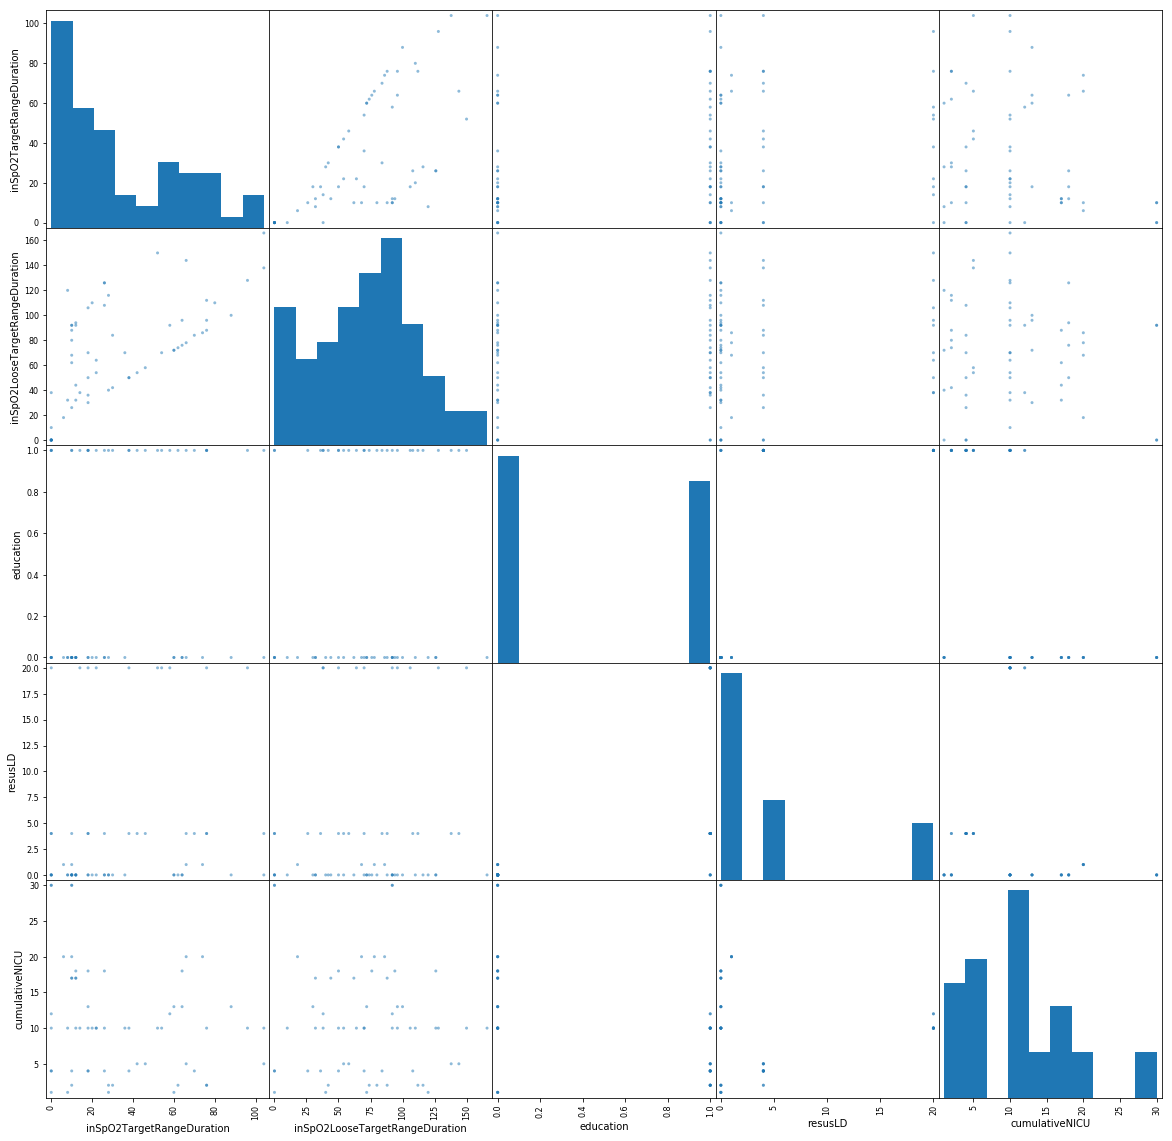

In [46]:
outcomes_df = full_df[statistics.TRACING_OUTCOMES + statistics.DEMO_OUTCOMES]

pd.plotting.scatter_matrix(outcomes_df, figsize=(20, 20))

In [49]:
outcomes_df.corr('pearson')

,inSpO2TargetRangeDuration,inSpO2LooseTargetRangeDuration,education,resusLD,cumulativeNICU
inSpO2TargetRangeDuration,1.000000,0.639573,0.223706,0.177249,-0.219380
inSpO2LooseTargetRangeDuration,0.639573,1.000000,0.084540,0.120907,-0.100954
education,0.223706,0.084540,1.000000,0.625760,-0.574828
resusLD,0.177249,0.120907,0.625760,1.000000,-0.122393
cumulativeNICU,-0.219380,-0.100954,-0.574828,-0.122393,1.000000


In [50]:
outcomes_df.corr('spearman')

,inSpO2TargetRangeDuration,inSpO2LooseTargetRangeDuration,education,resusLD,cumulativeNICU
inSpO2TargetRangeDuration,1.000000,0.639535,0.259063,0.250290,-0.172435
inSpO2LooseTargetRangeDuration,0.639535,1.000000,0.071420,0.051974,-0.034422
education,0.259063,0.071420,1.000000,0.795719,-0.562408
resusLD,0.250290,0.051974,0.795719,1.000000,-0.206621
cumulativeNICU,-0.172435,-0.034422,-0.562408,-0.206621,1.000000
